In [ ]:
#importing liblaries
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB


DATA UNDERSTANDING

In [ ]:
file_path = "C:\\Users\\HP\\Desktop\\terry dtops data\\Terry_Stops_20240301.csv"
df = pd.read_csv(file_path)

df

In [ ]:
df.head()

In [ ]:
df.dtypes

In [ ]:
df.columns

In [ ]:
# Iterating over columns to identify categorical variables
for column in df.columns:
    if df[column].dtype == 'object':
        unique_values = df[column].unique()
        print(f"Unique values for {column}: {unique_values}")

In [ ]:
df.describe()

In [ ]:
#checking for null values
missing_values = df.isnull().sum()
missing_values

In [ ]:
# Checking for NaN values in the DataFrame
nan_values = df.isna().sum()

# Display columns with NaN values and their respective counts
print("Columns with NaN values:")
print(nan_values[nan_values > 0])


### Feature engineering 

In [ ]:

# Creating a new feature indicating whether a weapon was involved in the stop
df['Weapon Involved'] = df['Weapon Type'].notnull().astype(int)


# Creating a new feature representing the geographical area of the stop by combining "Precinct", "Sector", and "Beat"
df['Geographical Area'] = df['Precinct'] + '-' + df['Sector'] + '-' + df['Beat']

print(df.head())


In [ ]:
df.head()

In [ ]:

#interaction terms between officers race and call type
df['Race_CallType'] = df['Officer Race'] + '_' + df['Call Type']

print(df.head())


In [ ]:
df.head()

### Data Analysis and exploration

Getting the relevant collumns for my analysis

In [32]:

selected_columns = ['Officer Race', 'Subject Perceived Race', 'Stop Resolution', 'Geographical Area','Weapon Involved']
race_relationship_data = df[selected_columns]

race_relationship_data.head()

,Officer Race,Subject Perceived Race,Stop Resolution,Geographical Area,Weapon Involved
0,Hispanic or Latino,White,Arrest,Southwest-W-W1,1
1,White,White,Arrest,West-Q-Q3,0
2,White,White,Arrest,Southwest-W-W1,0
3,White,White,Offense Report,North-J-J2,0
4,White,Black or African American,Offense Report,North-N-N3,0


In [ ]:
race_relationship_data.dtypes

### Race composition for officers and subject involved

In [ ]:
race_counts = race_relationship_data['Officer Race'].value_counts()

# Plotting the race composition
plt.figure(figsize=(8, 6))
sns.barplot(x=race_counts.index, y=race_counts.values, palette='viridis')
plt.title('Race Composition of Officers')
plt.xlabel('Officer Race')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()


In [ ]:
# Plotting the distribution of subject perceived race with rotated labels
plt.figure(figsize=(10, 6))
sns.countplot(x='Subject Perceived Race', data=race_relationship_data, palette='viridis')
plt.title('Distribution of Subject Perceived Race')
plt.xlabel('Subject Perceived Race')
plt.ylabel('Count')
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()

### Relationship between office and subject by race

In [ ]:

# i'm Creating a pivot table to count occurrences of each combination of races
pivot_table = race_relationship_data.pivot_table(index='Officer Race', columns='Subject Perceived Race', aggfunc='size', fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='viridis')
plt.title('Relationship between Officer Race and Subject Perceived Race')
plt.xlabel('Subject Perceived Race')
plt.ylabel('Officer Race')
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0, va='center')  
plt.tight_layout()  
plt.show()

## Hypothesis Testing: Relationship Between Officer's Race and Stop Resolution

### Hypotheses:
- **Null Hypothesis (H0):** There is no association between the officer's race and the stop resolution.
- **Alternative Hypothesis (H1):** There is an association between the officer's race and the stop resolution.

### Finding:
Based on the small p-value obtained from the chi-square test (much smaller than the significance level of 0.05), we reject the null hypothesis in favor of the alternative hypothesis, indicating that there is indeed a significant association between the officer's race and the stop resolution.
This analysis suggests that the type of stop resolution is not independent of the officer's race, indicating potential biases or underlying factors influencing the stop resolution based on the officer's race.

In [30]:
from scipy.stats import chi2_contingency

# Creating a contingency table
contingency_table = pd.crosstab(race_relationship_data['Officer Race'], race_relationship_data['Stop Resolution'])

print("Contingency Table:")
print(contingency_table)

# Calculating chi-square statistic and p-value
chi2, p, _, _ = chi2_contingency(contingency_table)
print("\nChi-square Statistic:", chi2)
print("P-value:", p)

Contingency Table:
Stop Resolution                Arrest  Citation / Infraction  Field Contact  \
Officer Race                                                                  
American Indian/Alaska Native      79                      0            148   
Asian                             667                      8           1368   
Black or African American         494                     10           1240   
Hispanic or Latino                927                     19           2212   
Nat Hawaiian/Oth Pac Islander     111                      2            239   
Not Specified                     629                     16           1278   
Two or More Races                 998                     18           2039   
Unknown                            21                      1             69   
White                           10519                    140          20695   

Stop Resolution                Offense Report  Referred for Prosecution  
Officer Race                         

contingency table visualization

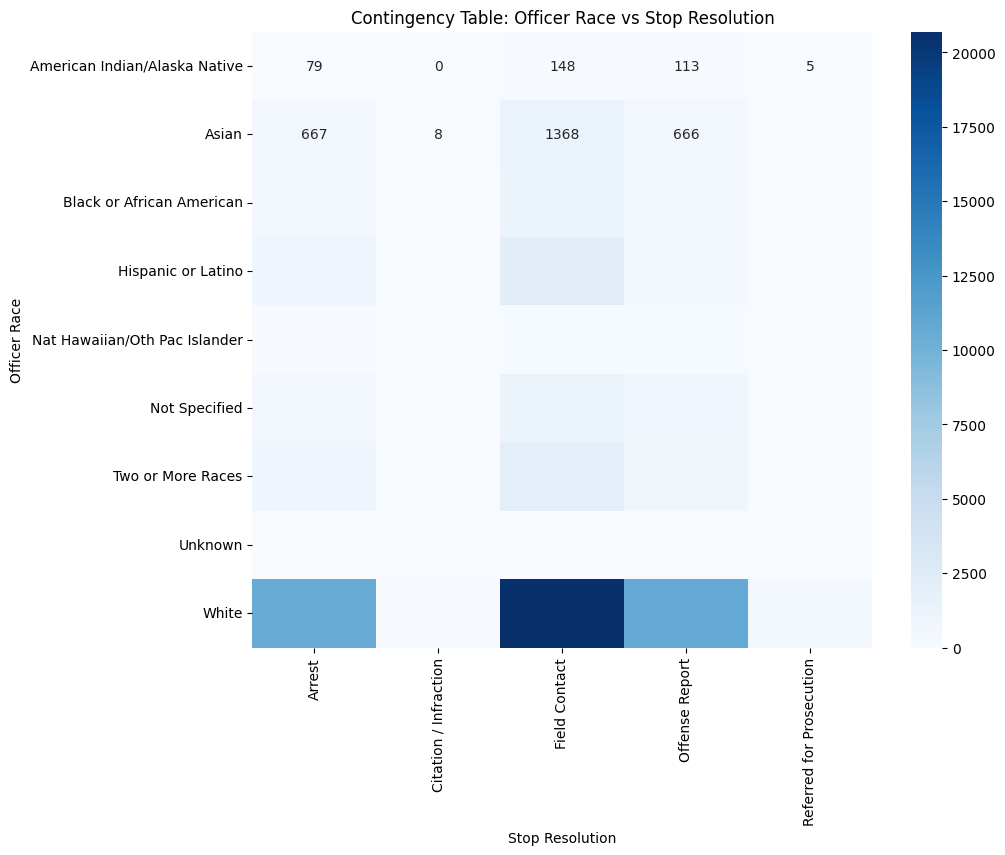

In [31]:

# Define the contingency table
contingency_table = [[79, 0, 148, 113, 5],
                     [667, 8, 1368, 666, 28],
                     [494, 10, 1240, 610, 23],
                     [927, 19, 2212, 644, 33],
                     [111, 2, 239, 175, 5],
                     [629, 16, 1278, 755, 33],
                     [998, 18, 2039, 843, 37],
                     [21, 1, 69, 9, 0],
                     [10519, 140, 20695, 10678, 562]]

# Defining officer races and stop resolutions
officer_races = ['American Indian/Alaska Native', 'Asian', 'Black or African American', 
                 'Hispanic or Latino', 'Nat Hawaiian/Oth Pac Islander', 'Not Specified', 
                 'Two or More Races', 'Unknown', 'White']
stop_resolutions = ['Arrest', 'Citation / Infraction', 'Field Contact', 
                    'Offense Report', 'Referred for Prosecution']

# Creating a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d',
            xticklabels=stop_resolutions, yticklabels=officer_races, cbar=True)
plt.title('Contingency Table: Officer Race vs Stop Resolution')
plt.xlabel('Stop Resolution')
plt.ylabel('Officer Race')
plt.show()


### Stop resolutions in randomly selected areas

In [ ]:
# Select random areas
random_areas = df['Geographical Area'].sample(n=11, random_state=42)  # Change n to the number of random areas you want

# Filter DataFrame to include only randomly selected areas
df_random_areas = df[df['Geographical Area'].isin(random_areas)]

# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(data=df_random_areas, x='Geographical Area', hue='Stop Resolution')
plt.title('Stop Resolutions in Randomly Selected Geographical Areas')
plt.xlabel('Geographical Area')
plt.ylabel('Count')
plt.legend(title='Stop Resolution')
plt.xticks(rotation=45, ha='right')
plt.show()

### stop resolutions with weapons involvement

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Stop Resolution', hue='Weapon Involved')
plt.title('Stop Resolutions with Weapon Involvement')
plt.xlabel('Stop Resolution')
plt.ylabel('Count')
plt.legend(title='Weapon Involved', labels=['No', 'Yes'])
plt.xticks(rotation=45, ha='right')
plt.show()